In [15]:
# import required libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import bokeh as bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from prophet import Prophet

In [18]:
all_data = pd.read_excel('data/allStores_2007toPresent_final.xls')
all_data.head()

,Year,Month,Monthn,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
0,NaN,NaN,NaN,NaN,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons
1,2007,November,11.0,47.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2007,November,11.0,48.0,NaN,NaN,NaN,NaN,4697.64,148,NaN,NaN,NaN,NaN,4697.64,148
3,2007,December,12.0,49.0,NaN,NaN,NaN,NaN,3233.57,88,NaN,NaN,NaN,NaN,3233.57,88
4,2007,December,12.0,50.0,NaN,NaN,NaN,NaN,4526.86,133,NaN,NaN,NaN,NaN,4526.86,133


In [21]:
store1 = pd.read_csv('data/store1_data.csv')
store2 = pd.read_csv('data/store2_data.csv')
store3 = pd.read_csv('data/store3_data.csv')
store4 = pd.read_csv('data/store4_data.csv')
store5 = pd.read_csv('data/store5_data.csv')

,date,Sales,Gallons
0,2007-11-19,NaN,NaN
1,2007-11-26,NaN,NaN
2,2007-12-03,NaN,NaN
3,2007-12-10,NaN,NaN
4,2007-12-17,NaN,NaN


In [31]:
store3 = store3.dropna(subset=['Sales', 'Gallons'])
store3[['Sales', 'Gallons']] = store3[['Sales', 'Gallons']].astype(int)
store3['date'] = pd.to_datetime(store3['date'])
store3.set_index('date', inplace= True)

store4 = store4.dropna(subset=['Sales', 'Gallons'])
store4[['Sales', 'Gallons']] = store4[['Sales', 'Gallons']].astype(int)
store4['date'] = pd.to_datetime(store4['date'])
store4.set_index('date', inplace= True)

store5 = store5.dropna(subset=['Sales', 'Gallons'])
store5[['Sales', 'Gallons']] = store5[['Sales', 'Gallons']].astype(int)
store5['date'] = pd.to_datetime(store5['date'])
store5.set_index('date', inplace= True)

In [27]:
store2 = store2.dropna(subset=['Sales', 'Gallons'])
store2[['Sales', 'Gallons']] = store2[['Sales', 'Gallons']].astype(int)
store2['date'] = pd.to_datetime(store2['date'])
store2.set_index('date', inplace= True)

In [35]:
from bokeh.models import NumeralTickFormatter

In [39]:
output_notebook()

# Create a ColumnDataSource from the DataFrame
# source = ColumnDataSource(final_test_data)

# Create a figure
p = figure(x_axis_type='datetime', title='Store Sales Over Time', width = 1300, height = 500)
# p.line(x='date', y='Sales', source=source, line_width=2, legend_label='Sales', color='blue')
# p.circle(x='date', y='Sales', source=store1, size=8, color='pink', legend_label='Store 1 Sales')
# p.circle(x='date', y='Sales', source=store2, size=8, color='purple', legend_label='Store 2 Sales')
# p.circle(x='date', y='Sales', source=store3, size=8, color='red', legend_label='Store 3 Sales')
# p.circle(x='date', y='Sales', source=store4, size=8, color='blue', legend_label='Store 4 Sales')
# p.circle(x='date', y='Sales', source=store5, size=8, color='green', legend_label='Store 5 Sales')
# p.line(x='date', y='Gallons', source=store1, line_width=2, legend_label='Gallons', color='green')
# p.circle(x='date', y='Gallons', source=source, size=8, color='green', legend_label='Gallons')
# p.line(x='date', y='Gallons', source=store2, line_width=2, legend_label='Gallons', color='red')

p.line(x='date', y='Sales', source=store1, line_width=2, legend_label='Store 1 Sales', color='pink')
p.line(x='date', y='Sales', source=store2, line_width=2, legend_label='Store 2 Sales', color='purple')
p.line(x='date', y='Sales', source=store3, line_width=2, legend_label='Store 3 Sales', color='red')
p.line(x='date', y='Sales', source=store4, line_width=2, legend_label='Store 4 Sales', color='blue')
p.line(x='date', y='Sales', source=store5, line_width=2, legend_label='Store 5 Sales', color='green')

# Customize the plot
p.legend.location = 'top_left'
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Sales in Dollars'
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

# Show the plot
show(p)

Loading BokehJS ...

In [41]:
from bokeh.io import export_png
export_png(p, filename='images/all_stores.png')

'c:\\group project 2\\project-2-group-3\\images\\all_stores.png'

In [2]:
total_path = Path('data/total_data.csv')
test_data = pd.read_csv(test_path)
test_data.head()

,Year,Week,Monthn,Sales,Gallons,date
0,2007,47,11,0.00,NaN,2007-11-19
1,2007,48,11,4697.64,148.0,2007-11-26
2,2007,49,12,3233.57,88.0,2007-12-03
3,2007,50,12,4526.86,133.0,2007-12-10
4,2007,51,12,7291.96,250.0,2007-12-17


In [43]:
output_notebook()

# Create a ColumnDataSource from the DataFrame
source = ColumnDataSource(final_test_data)

# Create a figure
p = figure(x_axis_type='datetime', title='Sales and Gallons Over Time', width = 1300, height = 500)
# p.line(x='date', y='Sales', source=source, line_width=2, legend_label='Sales', color='blue')
p.circle(x='date', y='Sales', source=source, size=8, color='blue', legend_label='Sales')
p.line(x='date', y='Gallons', source=source, line_width=2, legend_label='Gallons', color='green')
# p.circle(x='date', y='Gallons', source=source, size=8, color='green', legend_label='Gallons')


# Customize the plot
# p.legend.location = 'top_left'
# p.xaxis.axis_label = 'Date'
# p.yaxis.axis_label = 'Sales'
# p.grid.grid_line_alpha = 0.3

# Show the plot
show(p)

Loading BokehJS ...

In [31]:
total_path = Path('data/total_data.csv')
total_data = pd.read_csv(total_path)
total_data.head()

,date,Total_Sales,Total_Gallons
0,2007-11-19,0.00,NaN
1,2007-11-26,4697.64,148.0
2,2007-12-03,3233.57,88.0
3,2007-12-10,4526.86,133.0
4,2007-12-17,7291.96,250.0


In [36]:
# total_data.tail(50)

<Axes: xlabel='date'>

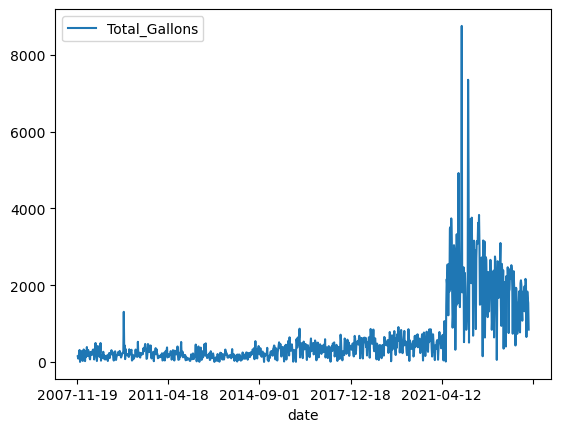

In [37]:
total_data.plot.line(
    x= 'date',
    y= 'Total_Gallons'
)

In [25]:
# final_test_data.head()
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     992 non-null    datetime64[ns]
 1   Sales    990 non-null    float64       
 2   Gallons  989 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.4 KB


In [29]:
from pandas.plotting import lag_plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


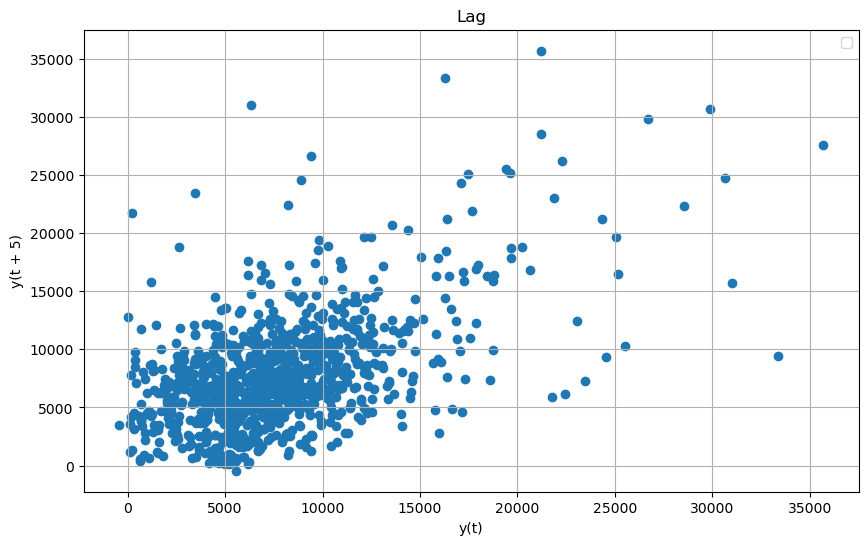

In [30]:
fig = plt.figure(figsize=(10, 6))
lag_plot(final_test_data['Sales'], lag=5)
plt.title('Lag')
plt.grid(True)
plt.legend();

In [5]:
test_data = pd.read_csv('data/total_data.csv')
test_data = test_data.dropna(subset=['Total_Sales', 'Total_Gallons'])
test_data[['Total_Sales', 'Total_Gallons']] = test_data[['Total_Sales', 'Total_Gallons']].astype(int)
test_data['date'] = pd.to_datetime(test_data['date'])
test_data.set_index('date', inplace= True)
# test_data.head()

In [6]:
output_notebook()

# Create a ColumnDataSource from the DataFrame
source = ColumnDataSource(test_data)

# Create a figure
p = figure(x_axis_type='datetime', title='Sales and Gallons Over Time', width = 1300, height = 500)
# p.line(x='date', y='Sales', source=source, line_width=2, legend_label='Sales', color='blue')
p.circle(x='date', y='Total_Sales', source=source, size=8, color='blue', legend_label='Sales')
p.line(x='date', y='Total_Gallons', source=source, line_width=2, legend_label='Gallons', color='green')
# p.circle(x='date', y='Gallons', source=source, size=8, color='green', legend_label='Gallons')


# Customize the plot
# p.legend.location = 'top_left'
# p.xaxis.axis_label = 'Date'
# p.yaxis.axis_label = 'Sales'
# p.grid.grid_line_alpha = 0.3

# Show the plot
show(p)

Loading BokehJS ...

In [12]:
from bokeh.io import export_png
from bokeh.io import export_svgs

In [14]:
export_png(p, filename='images/total_sales.png')

'c:\\group project 2\\project-2-group-3\\data\\total_sales.png'